Bibliotecas 

In [107]:
# Importar as bibliotecas
# Análise Exploratória de dados 
import pandas as pd  
import numpy as np

# Visualização
from matplotlib import pyplot as plt  
import seaborn as sns 
 
# Pré-processamento e modelos    
from sklearn.preprocessing import MinMaxScaler 
from imblearn.over_sampling  import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
import lightgbm as lgbm


pd.set_option("display.max_columns",None) # mostrar todas as colunas 
pd.set_option("display.max_rows",None) # mostrar todas as linhas

1. Entendimento do negócio

1.1. Situação
- Os clientes são a base de uma instituição financeira. Portanto, é muito importante para uma instituição prever se os seus clientes irão ou não abandonar (churn) o seu serviço. Assim, quanto melhor for a predição, melhor será o direcionamento, por exemplo, em ações financeiras e em ações de marketing para evitar que o cliente abandone a instituição.

1.2. Objetivo:
- Prever o abandono de clientes (churn) de uma instituição financeira

1.3. Etapas usadas para solucionar o problema acima:

- Entendimento do negócio (que foi descrito acima);
- Entendimento dos dados;
- Preparação dos dados; 
- Modelagem e Avaliação;
- Previsão.

2. Entendimento dos dados (Explorar os conjuntos de dados)
- 2.1. Importar os conjuntos de dados;
- 2.2. Informações sobre os conjuntos de dados;
- 2.3. Estatística das variáveis.

2.1. Importar os conjuntos de dados (datasets) 

2.1.1. Importar o conjunto de dados (dataset) nomeado Abandono_clientes (dados de treino)

In [2]:
df_treino = pd.read_csv("Abandono_clientes.csv", na_values="na")

2.1.2. Importar a conjunto de dados (dataset) nomeado Abandono_teste (dados teste). Representam dados que nunca foram vistos

In [3]:
df_teste = pd.read_csv("Abandono_teste.csv",na_values="na")  

2.2. Informações sobre os conjuntos de dados

2.2.1. Dados de treino  

In [4]:
df_treino.head() # visualizar as cinco primeiras linhas do conjunto de dados treino

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
display(df_treino.dtypes) # tipo de cada coluna do conjunto de dados de treino

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

2.2.2 Dados de teste

In [6]:
df_teste.head() # visualizar as cinco primeiras linhas do conjunto de dados 

,RowNumber;CustomerId;Surname;CreditScore;Geography;Gender;Age;Tenure;Balance;NumOfProducts;HasCrCard;IsActiveMember;EstimatedSalary
0,10001;15798485;Copley;565;France;Male;31;1;0;1...
1,10002;15588959;T'ang;569;France;Male;34;4;0;1;...
2,10003;15624896;Ku;669;France;Female;20;7;0;2;1...
3,10004;15639629;McConnan;694;France;Male;39;4;1...
4,10005;15638852;Ts'ui;504;Spain;Male;28;10;1092...


Conforme mostra acima, todas as informações estão em uma única entrada de coluna. Isso ocorreu porque o read_csv usa um parâmetro sep onde o padrão é ",". Acima as colunas estão separadas por ";", assim, usar sep=";"     

In [7]:
df_teste = pd.read_csv("Abandono_teste.csv",sep=';', na_values="na")  

In [8]:
df_teste.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,10001,15798485,Copley,565,France,Male,31,1,0.00,1,0,1,20443.08
1,10002,15588959,T'ang,569,France,Male,34,4,0.00,1,0,1,4045.90
2,10003,15624896,Ku,669,France,Female,20,7,0.00,2,1,0,128838.67
3,10004,15639629,McConnan,694,France,Male,39,4,173255.48,1,1,1,81293.10
4,10005,15638852,Ts'ui,504,Spain,Male,28,10,109291.36,1,1,1,187593.15


In [9]:
display(df_teste.dtypes) # tipo de cada coluna do conjunto de dados

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

Nos conjuntos de dados acima, cada coluna representa uma informação/variável sobre o cliente.

Questão 1. O que significa cada variável? Qual é o tipo de cada variável?  

a) Variáveis numéricas (int64 ou float64)
- RowNumber: número de linhas (int64) 
- CustomerId: Id do cliente (int64)
- CreditScore: score (pontuação) de crédito do cliente (int64)
- Age: idade do cliente (int64)
- Tenure: tempo de vínculo do cliente com a instituição financeira (int64). Observação: no conjunto de dados não consta a medida de tempo (são meses ou anos). Vou considerar anos.   
- Balance: montante em dinheiro disponível na conta do cliente (float64). Observação: no conjunto de dados não cosnta a moeda (é dolár, euro, libra, etc). Vou considerar euros, uma vez que os clientes estão localizados em países da Europa.
- NumbOfProducts: número de produtos da instituição financeira que o cliente possui (int64)
- HasCrCard: o cliente tem cartão de crédito? 0 = não e 1 = sim (int64)
- IsActiveMember: o cliente é um membro ativo? 0 = não e 1 = sim (int64) 
- EstimatedSalary: salário estimado do cliente (float64)
- Exited: o cliente abandonou a instituição financeira? 0 = não e 1 = sim (int64)

b) Variáveis categóricas (object)
- Surname: sobrenome do cliente
- Geography: localização do cliente
- Gender: gênero do cliente (male = masculino e female = feminino)

Questão 2. Qual a quantidade de variáveis e clientes?   

In [10]:
# quantificar as variáveis e clientes do conjunto de dados de treino
print("Número de variáveis:\t {}".format(df_treino.shape[1]))
print("Número de clientes:\t {}".format(df_treino.shape[0]))

Número de variáveis:	 14
Número de clientes:	 10000


In [11]:
# quantificar as variáveis e clientes do conjunto de dados de teste
print("Número de variáveis:\t {}".format(df_teste.shape[1]))
print("Número de clientes:\t {}".format(df_teste.shape[0]))

Número de variáveis:	 13
Número de clientes:	 1000


Questão 3. Existem valores ausentes nos conjuntos de dados? Qual a quantidade de valores únicos em cada variável?

In [12]:
# criar um dataframe informando a quantidade de valores ausentes e de valores únicos para cada varíavel do conjunto de dados de treino
pd.DataFrame({"Valores Ausentes": df_treino.isna().mean(),
              "Valores Únicos": df_treino.nunique()})

,Valores Ausentes,Valores Únicos
RowNumber,0.0,10000
CustomerId,0.0,10000
Surname,0.0,2932
CreditScore,0.0,460
Geography,0.0,3
Gender,0.0,2
Age,0.0,70
Tenure,0.0,11
Balance,0.0,6382
NumOfProducts,0.0,4


In [13]:
# criar um dataframe informando a quantidade de valores ausentes e de valores únicos para cada varíavel do conjunto de dados de teste
pd.DataFrame({"Valores Ausentes": df_teste.isna().mean(),
              "Valores Únicos": df_teste.nunique()})

,Valores Ausentes,Valores Únicos
RowNumber,0.0,1000
CustomerId,0.0,1000
Surname,0.0,715
CreditScore,0.0,353
Geography,0.0,3
Gender,0.0,2
Age,0.0,59
Tenure,0.0,11
Balance,0.0,622
NumOfProducts,0.0,4


- Não existem valores ausentes nos conjuntos de dados
- E quanto aos valores únicos, é sempre bom verificar, especialmente para as variáveis (i) HasCrCard, IsActiveMember e Exited que precisam conter dois tipos de informação (valor): 1 ou 0 e (ii) gender: female ou male. Logo, a quantidade de valores únicos (ou seja, total unitário) precisa ser 2.

Questão 4. Existem variáveis que não trazem nenhuma informação útil para o objetivo do projeto (prever o churn "abondono de clientes" da instituição financeira)? 

Sim! São as variáveis RowNumber, CustomerId e Surname. Portanto, retirar tais variáveis dos conjuntos de dados. Tais variáveis são apenas para ajudar no gerenciamento do banco de dados da instituição financeira.

In [14]:
print("Número de variáveis:\t {}".format(df_treino.shape[1]))

Número de variáveis:	 14


In [15]:
df_treino= df_treino.drop(columns=["RowNumber","CustomerId","Surname"])

In [16]:
print("Número de variáveis:\t {}".format(df_treino.shape[1])) # verificar se as variáveis foram removidas

Número de variáveis:	 11


In [17]:
df_treino.head() # conjunto de dados de treino sem as variáveis RowNumber, CustomerId e Surname

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
print("Número de variáveis:\t {}".format(df_teste.shape[1]))

Número de variáveis:	 13


In [19]:
df_teste= df_teste.drop(columns=["RowNumber","CustomerId","Surname"])

In [20]:
print("Número de variáveis:\t {}".format(df_teste.shape[1]))

Número de variáveis:	 10


In [21]:
df_teste.head() # conjunto de dados de teste sem as variáveis RowNumber, CustomerId e Surname

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,565,France,Male,31,1,0.00,1,0,1,20443.08
1,569,France,Male,34,4,0.00,1,0,1,4045.90
2,669,France,Female,20,7,0.00,2,1,0,128838.67
3,694,France,Male,39,4,173255.48,1,1,1,81293.10
4,504,Spain,Male,28,10,109291.36,1,1,1,187593.15


Questão 5. Existem valores duplicados?

In [22]:
novo_df_treino = df_treino.drop_duplicates() # remover as linhas duplicadas
duplicadas_df_treino = novo_df_treino[novo_df_treino.duplicated()] # calcular o total de linhas duplicadas
print(f"Total de linhas duplicadas: {len(duplicadas_df_treino)}")

Total de linhas duplicadas: 0


In [23]:
novo_df_teste = df_teste.drop_duplicates() # remover as linhas duplicadas
duplicadas_df_teste = novo_df_teste[novo_df_teste.duplicated()] # calcular o total de linhas duplicadas
print(f"Total de linhas duplicadas: {len(duplicadas_df_teste)}")

Total de linhas duplicadas: 0


Não! Os conjuntos de dados não possuem valores duplicados.

Questão 6. Existem outliers (valores discrepantes)?

<AxesSubplot:xlabel='CreditScore'>

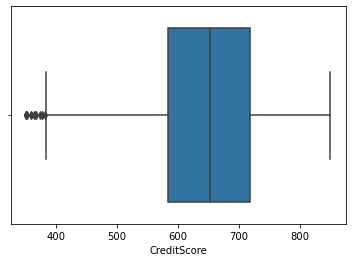

In [24]:
# Variáveis numéricas
sns.boxplot(x="CreditScore",data=df_treino)

<AxesSubplot:xlabel='Age'>

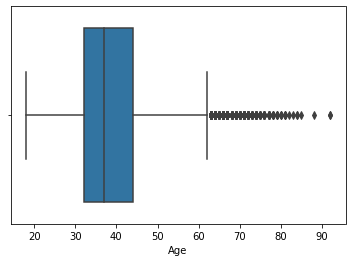

In [25]:
# Variáveis numéricas
sns.boxplot(x="Age",data=df_treino)

<AxesSubplot:xlabel='Tenure'>

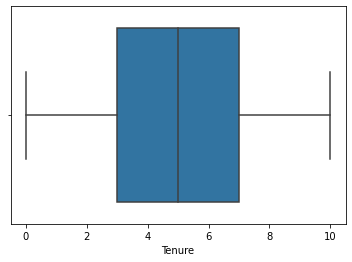

In [26]:
# Variáveis numéricas
sns.boxplot(x="Tenure",data=df_treino)

<AxesSubplot:xlabel='Balance'>

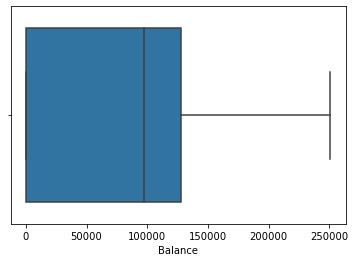

In [27]:
# Variáveis numéricas
sns.boxplot(x="Balance",data=df_treino)

<AxesSubplot:xlabel='NumOfProducts'>

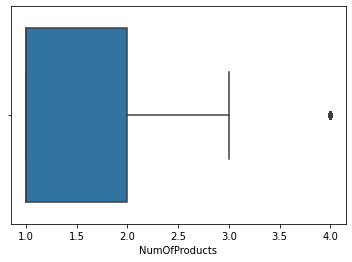

In [28]:
# Variáveis numéricas
sns.boxplot(x="NumOfProducts",data=df_treino)

<AxesSubplot:xlabel='EstimatedSalary'>

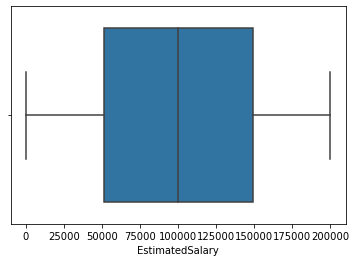

In [29]:
# Variáveis numéricas
sns.boxplot(x="EstimatedSalary",data=df_treino)

Observação geral sobre a presença de outliers: 
- EstimatedSalary, Balance, Tenure não possuem outliers;
- NumOfProducts, Age e CreditScore possuem outliers. 


Outliers podem causar ruídos na análise de dados, ou seja, viesar a(s) análise(s) subsequentes. Então, o que fazer com os outliers?

Listo algumas estratégias:
- entrar em contato com a equipe responsável pela coleta dos dados para verificar se tais outliers possam ser devido algum erro durante o processo de coleta dos dados. Caso afirmativo, os outliers seriam arrumados;

- remover os outliers. Isso implica perder linha(s) inteira(s) do conjunto de dados. No presente projeto seria perder clientes. Temos uma grande quantidade de observações (n = 10000), porém, a variável alvo (Exited) está desbalanceada (conforme mostrado na etapa posterior), assim, existe o risco de aumentar ainda mais esse desbalanceamento. Portanto, seria preciso avaliar o impacto da remoção dos outliers

- substituir os valores dos outliers por um valor de uma medida de estatística descritiva (por exemplo, média ou moda). Ou também alterar o valor do(s) outlier(s) usando os valores da barra superior e inferior, ou seja, outlier(s) acima da barra superior receberiam o valor da barra superior e outlier(s) abaixo da barra inferior receberiam o valor da barra inferior   

- Neste presente projeto, inicialmente, vou continuar com os outliers. Partindo da seguinte premissa: "objetivo é buscar padrões e/ou fazer previsões aos quais não se tem nenhuma informação a priori". Porém, se os modelos apresentarem performances ruins, retorno nesta questão 

2.3. Estatísticas das variáveis

2.3.1. Variável alvo (também conhecida como target, y ou resposta) no conjunto de dados de treino. Exited é a variável alvo e possui dois valores: 
- "1" cliente abandonou a instituição financeira, ou seja, ocorreu churn
- "0" cliente não abandonou a instituição financeira

2.3.1.1. Estatística descritiva da variável alvo

In [30]:
y=df_treino["Exited"]

Questão 7. Como se comporta a variável alvo? 

In [31]:
# Quantidade de clientes que abandonaram a instituição financeira
y_1=sum(y==1)
print("Quantidade de clientes que abandonaram a instituição financeira: {}".format(y_1))

Quantidade de clientes que abandonaram a instituição financeira: 2037


In [32]:
# Quantidade de clientes que não abandonaram a instituição financeira
y_0=sum(y==0)
print("Quantidade de clientes que não abandonaram a instituição financeira: {}".format(y_0))

Quantidade de clientes que não abandonaram a instituição financeira: 7963


In [33]:
# Proporção de clientes que abandonaram a instituição financeira
prop_y_1=sum(y==1)*100/y.shape[0]
print("Porcentagem de clientes que abandonaram a instituição financeira: {}".format(prop_y_1))

# Proporção de clientes que não abandonaram a instituição financeira
prop_y_0=sum(y==0)*100/y.shape[0]
print("Porcentagem de clientes que não abandonaram a instituição financeira: {}".format(prop_y_0))

Porcentagem de clientes que abandonaram a instituição financeira: 20.37
Porcentagem de clientes que não abandonaram a instituição financeira: 79.63


In [34]:
# Criar um dataframe com os dados acima
y_df=pd.DataFrame([["Não",7963,79.63],["Sim",2037,20.37]],index=range(0,2),columns=["Abandono (Churn)","Quantidade de Clientes (N)", "Porcentagem de Clientes (%)"])
display(y_df)

,Abandono (Churn),Quantidade de Clientes (N),Porcentagem de Clientes (%)
0,Não,7963,79.63
1,Sim,2037,20.37


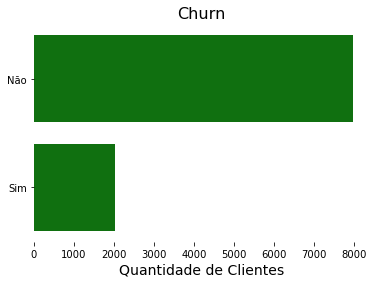

In [35]:
# Mostrar os dados da variável alvo em um gráfico de barras (Quantidade de clientes) 
sns.set_color_codes("dark")
g = sns.barplot(x="Quantidade de Clientes (N)", y="Abandono (Churn)",data=y_df, color="green")
g.axes.set_title("Churn", fontsize=16,color="black",alpha=3)
g.set_xlabel("Quantidade de Clientes", size = 14,color="black")
g.set_ylabel("")
sns.despine(left=True, bottom=True)
plt.show()

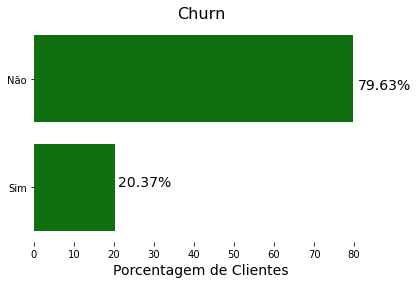

In [36]:
# Mostrar os dados da variável alvo em um gráfico de barras (Quantidade de clientes) 
sns.set_color_codes("dark")
g = sns.barplot(x="Porcentagem de Clientes (%)", y="Abandono (Churn)",data=y_df, color="green")
g.axes.set_title("Churn", fontsize=16,color="black",alpha=3)
g.set_xlabel("Porcentagem de Clientes", size = 14,color="black")
g.set_ylabel("")
plt.text(81,0.1,"79.63%",fontsize=14)
plt.text(21,0.99,"20.37%",fontsize=14)         
sns.despine(left=True, bottom=True)
plt.show()

Através das informações acima podemos verificar que a maioria dos clientes não abandonaram a instituição financeira. Simplesmente, em cada dez clientes, dois abandonaram a instituição financeira. Além disso, está evidente que o conjunto de dados de treino está desbalanceado. 

Consequências de dados desbalanceados na construção de um modelo de aprendizado de máquina (machine learning):

O modelo terá uma tendência a dar muitos "alarmes falsos". Ou seja, na prática o modelo irá responder muito para a classe majoritária (sem abandono = não churn), mas terá um desempenho inferior para a classe minoritária (com abandono = churn). Logo, esse fato merece atenção na hora do pré-processamento dos dados.

Questão 8. Quem são as outras variáveis?

São as variáveis explicativas (também conhecidas como preditoras, X ou explanatórias) dos conjuntos de dados. São as variáveis: CredtiScore, Geography, Gender, Age, Tenure, Balance, NumberOfProducts, HasCrCard, IsActiveMember, EstimatedSalary. Total: 10 variáveis

2.3.2. Variáveis X 

In [37]:
X_treino=df_treino.drop(columns=["Exited"])

In [38]:
X_treino.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


Questão 9. Qual o comportamento geral das variáveis X?   

2.3.2.1. Análise univariada das variáveis X que são numéricas

In [39]:
X_numericas=X_treino.select_dtypes(exclude=["object"])

In [40]:
X_numericas.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [41]:
X_numericas.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


- Acima constam o número de observações (count), média (mean), desvio padrão (std), valor máximo (max) e minimo (min) e os quartis (25%, 50% e 75%) para cada uma das variáveis X numéricas
- As variáveis possuem escalas de grandezas distintas. Esse fato merece atenção na hora da etapa de pré-processamento

2.3.2.2. Análise univariada das variáveis X que são categóricas

In [42]:
X_categoricas=X_treino.select_dtypes(include=["object"])

In [43]:
X_categoricas.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [44]:
X_categoricas.describe(include=object)

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


C:\Users\Fabi Borges\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Fabi Borges\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Fabi Borges\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Fabi

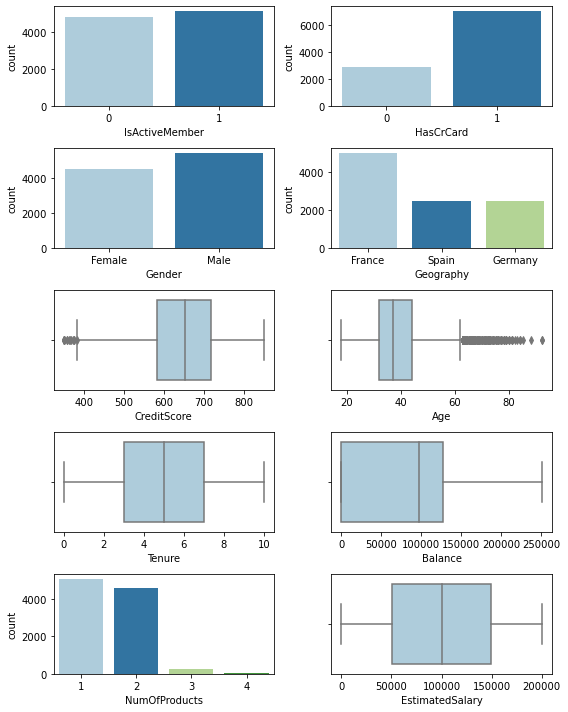

In [45]:
fig, ax = plt.subplots(5,2, figsize = (8,10)) # visualizar as variáveis X
sns.countplot(X_numericas["IsActiveMember"], palette = 'Paired', ax = ax[0][0])
sns.countplot(X_numericas["HasCrCard"], palette = 'Paired', ax = ax[0][1])
sns.countplot(X_categoricas["Gender"], palette = "Paired", ax = ax[1][0])
sns.countplot(X_categoricas["Geography"], palette = "Paired", ax = ax[1][1])
sns.boxplot(X_numericas["CreditScore"], palette = 'Paired', ax = ax[2][0])
sns.boxplot(X_numericas["Age"], palette = 'Paired', ax = ax[2][1])
sns.boxplot(X_numericas["Tenure"], palette = "Paired", ax = ax[3][0])
sns.boxplot(X_numericas["Balance"], palette = "Paired", ax = ax[3][1])
sns.countplot(X_numericas["NumOfProducts"], palette = "Paired", ax = ax[4][0])
sns.boxplot(X_numericas["EstimatedSalary"], palette = "Paired", ax = ax[4][1])
plt.tight_layout()
plt.show()

2.3.2.3. Análise das variáveis X considerando a variável alvo 

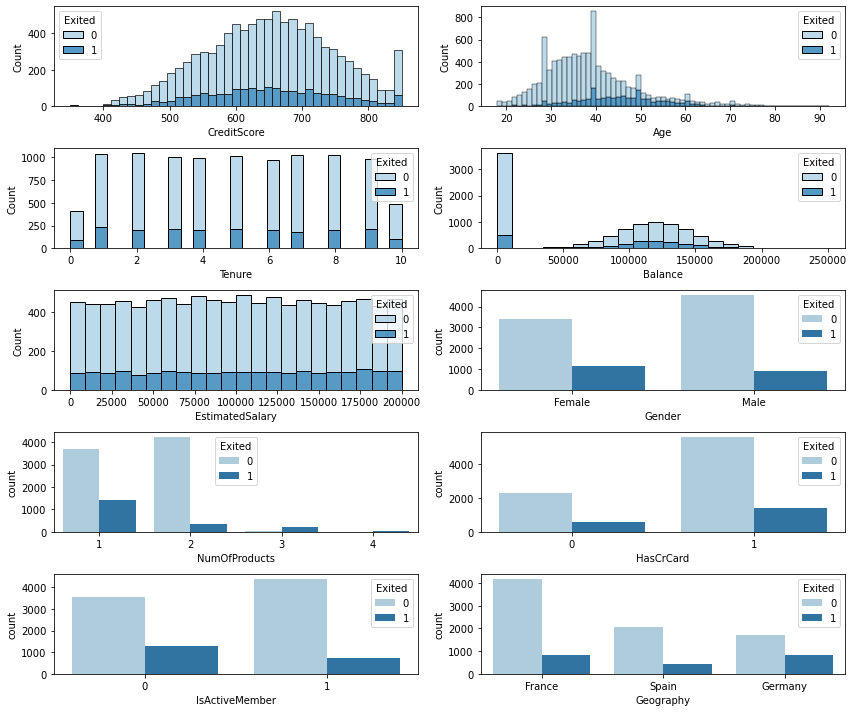

In [46]:
fig, ax = plt.subplots(5,2, figsize = (12,10))
sns.histplot(hue= 'Exited', x= 'CreditScore', multiple='stack', data = df_treino, palette = 'Paired', ax = ax[0][0])
sns.histplot(hue= 'Exited', x= 'Age', multiple='stack', data = df_treino, palette = 'Paired', ax = ax[0][1])
sns.histplot(hue= 'Exited', x= 'Tenure', multiple='stack', data = df_treino, palette = 'Paired', ax = ax[1][0])
sns.histplot(hue= 'Exited', x= 'Balance', multiple='stack', data = df_treino, palette = 'Paired', ax = ax[1][1])
sns.histplot(hue= 'Exited', x= 'EstimatedSalary', multiple='stack', data = df_treino, palette = 'Paired', ax = ax[2][0])
sns.countplot(x= 'Gender', hue= 'Exited', data = df_treino, palette = 'Paired', ax = ax[2][1])
sns.countplot(x= 'NumOfProducts', hue= 'Exited', data = df_treino, palette = 'Paired', ax = ax[3][0])
sns.countplot(x= 'HasCrCard', hue= 'Exited', data = df_treino, palette = 'Paired', ax = ax[3][1])
sns.countplot(x= 'IsActiveMember', hue= 'Exited', data = df_treino, palette = 'Paired', ax = ax[4][0])
sns.countplot(x= 'Geography', hue= 'Exited', data = df_treino, palette = 'Paired', ax = ax[4][1])
plt.tight_layout()
plt.show()

Olhar com mais detalhes determinadas variáveis Xs

In [47]:
df_treino.IsActiveMember.value_counts() # total de clientes em cada categoria de membro ativo

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [48]:
# número de clientes em cada categoria de membro ativo (1 ou 0)
num_yes = len(df_treino[df_treino.IsActiveMember == 1])
num_no = len(df_treino[df_treino.IsActiveMember == 0])

# número de clientes que abandonaram em cada categoria de membro ativo
ex_yes = len(df_treino[(df_treino.IsActiveMember == 1) & (df_treino.Exited == 1)])
ex_no = len(df_treino[(df_treino.IsActiveMember == 0) & (df_treino.Exited == 1)]) 

yes_ex_rate = ex_yes/num_yes
no_ex_rate = ex_no/num_no

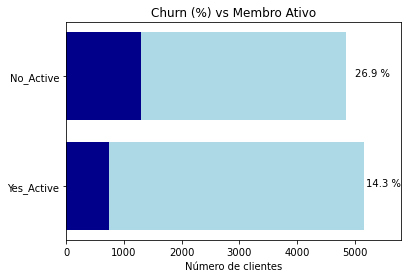

In [49]:
plt.barh(y = ['Yes_Active','No_Active'] , width = [num_yes,num_no], color = 'lightblue')
plt.barh(y = ['Yes_Active','No_Active'] , width = [ex_yes,ex_no] , color = 'darkblue')

plt.xlim(0,5800)

# mostrar a porcentagem de cliente que abandonou em cada categoria de membro ativo 
plt.text(5000 , 'No_Active','{:.1f} %'.format(no_ex_rate*100))
plt.text(5200 , 'Yes_Active','{:.1f} %'.format(yes_ex_rate*100))

plt.title('Churn (%) vs Membro Ativo')
plt.xlabel('Número de clientes')

plt.show()

In [50]:
df_treino.HasCrCard.value_counts() # total de clientes que possuem e não possuem cartão de crédito 

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [51]:
# número de clientes em cada categoria de membro ativo (1 ou 0)
num_yes = len(df_treino[df_treino.HasCrCard == 1])
num_no = len(df_treino[df_treino.HasCrCard == 0])

# número de clientes que abandonaram em cada categoria de membro ativo
ex_yes = len(df_treino[(df_treino.HasCrCard == 1) & (df_treino.Exited == 1)])
ex_no = len(df_treino[(df_treino.HasCrCard == 0) & (df_treino.Exited == 1)]) 

yes_ex_rate = ex_yes/num_yes
no_ex_rate = ex_no/num_no

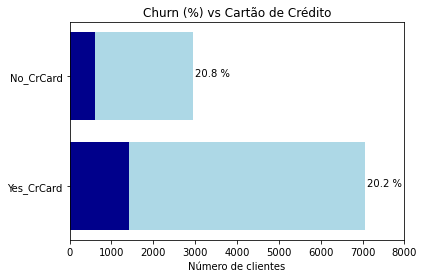

In [52]:
plt.barh(y = ['Yes_CrCard','No_CrCard'] , width = [num_yes,num_no], color = 'lightblue')
plt.barh(y = ['Yes_CrCard','No_CrCard'] , width = [ex_yes,ex_no] , color = 'darkblue')

plt.xlim(0,8000)

# mostrar a porcentagem de cliente que abandonou em cada categoria de membro ativo 
plt.text(3000 , 'No_CrCard','{:.1f} %'.format(no_ex_rate*100))
plt.text(7100 , 'Yes_CrCard','{:.1f} %'.format(yes_ex_rate*100))

plt.title('Churn (%) vs Cartão de Crédito')
plt.xlabel('Número de clientes')

plt.show()

In [53]:
df_treino.NumOfProducts.value_counts() # total de clientes em cada categoria de produto 

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [54]:
# número de clientes em cada categoria de produto (1, 2, 3 ou 4 produtos)
num_p1 = len(df_treino[df_treino.NumOfProducts == 1])
num_p2 = len(df_treino[df_treino.NumOfProducts == 2])
num_p3 = len(df_treino[df_treino.NumOfProducts == 3])
num_p4 = len(df_treino[df_treino.NumOfProducts == 4])

# número de clientes que abandonaram em cada categoria de produto
ex_p1 = len(df_treino[(df_treino.NumOfProducts == 1) & (df_treino.Exited == 1)])
ex_p2 = len(df_treino[(df_treino.NumOfProducts == 2) & (df_treino.Exited == 1)]) 
ex_p3 = len(df_treino[(df_treino.NumOfProducts == 3) & (df_treino.Exited == 1)])
ex_p4 = len(df_treino[(df_treino.NumOfProducts == 4) & (df_treino.Exited == 1)])

p1_ex_rate = ex_p1/num_p1
p2_ex_rate = ex_p2/num_p2
p3_ex_rate = ex_p3/num_p3
p4_ex_rate = ex_p4/num_p4

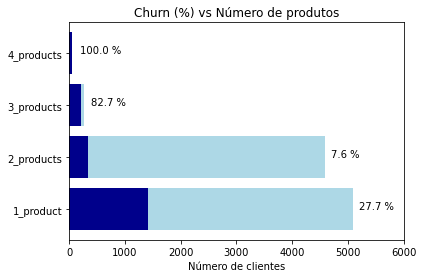

In [55]:
plt.barh(y = ['1_product','2_products','3_products','4_products'] , width = [num_p1,num_p2,num_p3,num_p4], color = 'lightblue')
plt.barh(y = ['1_product','2_products','3_products','4_products'] , width = [ex_p1,ex_p2,ex_p3,ex_p4] , color = 'darkblue')

plt.xlim(0,6000)

# mostrar a porcentagem de cliente que abandonou em cada categoria de produto 
plt.text(200 , '4_products','{:.1f} %'.format(p4_ex_rate*100)) 
plt.text(400 , '3_products','{:.1f} %'.format(p3_ex_rate*100))
plt.text(4700 , '2_products','{:.1f} %'.format(p2_ex_rate*100))
plt.text(5200 , '1_product','{:.1f} %'.format(p1_ex_rate*100))

plt.title('Churn (%) vs Número de produtos')
plt.xlabel('Número de clientes')

plt.show()

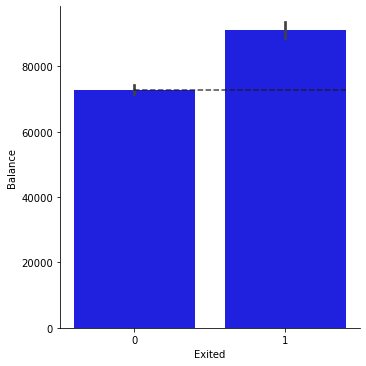

In [56]:
# montante médio em dinheiro disponível na conta dos clientes que abandonaram (1) e que não abandonaram a instituição financeira  
sns.catplot(data = df_treino , x = 'Exited'  , y = 'Balance' , kind = 'bar' , color = 'blue')
plt.plot([0,1.4],[df_treino[df_treino.Exited == 0]['Balance'].mean(),df_treino[df_treino.Exited == 0]['Balance'].mean()],linestyle = '--' , c ='k'
         , alpha = 0.8)
plt.show()

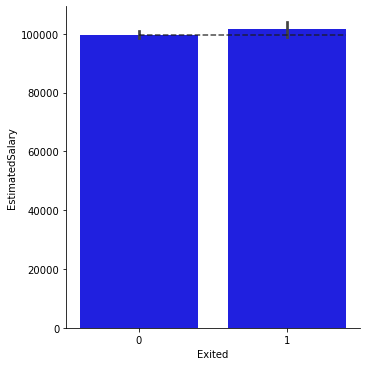

In [57]:
# Salário estimado médio dos clientes que abandonaram (1) e que não abandonaram a instituição financeira  
sns.catplot(data = df_treino , x = 'Exited'  , y = 'EstimatedSalary' , kind = 'bar' , color = 'blue')
plt.plot([0,1.4],[df_treino[df_treino.Exited == 0]['EstimatedSalary'].mean(),df_treino[df_treino.Exited == 0]['EstimatedSalary'].mean()],linestyle = '--' , c ='k'
         , alpha = 0.8)
plt.show()

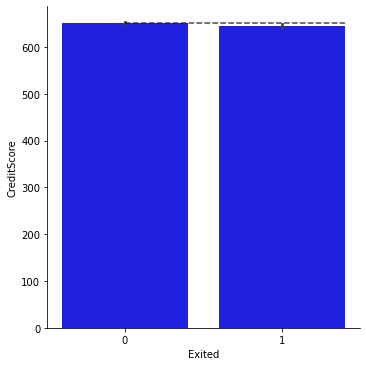

In [58]:
# Salário estimado médio dos clientes que abandonaram (1) e que não abandonaram a instituição financeira  
sns.catplot(data = df_treino , x = 'Exited'  , y = 'CreditScore' , kind = 'bar' , color = 'blue')
plt.plot([0,1.4],[df_treino[df_treino.Exited == 0]['CreditScore'].mean(),df_treino[df_treino.Exited == 0]['CreditScore'].mean()],linestyle = '--' , c ='k'
         , alpha = 0.8)
plt.show()

- A maioria dos clientes estão localizados na França. Os clientes alemães apresentaram maior número de abandono junto à instituição financeira
- O maior número de abandono ocorreu entre clientes do sexo feminino
- Clientes que não são membros ativos abandonaram mais a instituição financeira do que os clientes que são membros ativos 
- Todos os clientes (n = 60) que tinham 4 produtos abandonaram a instituição financeira. Clientes que tinham um (27.7%) e dois (7.6%) produtos abandonaram menos a instituição financeira do que os clientes tinham mais produtos
- Os clientes que mais abandonaram a instituição financeira foram os que tinham mais dinheiro disponível na conta. 
- Além disso, o salário estimado é praticamente o mesmo entre os clientes que abandonaram e os que permaneceram na instituição financeira. Assim como, a porcentagem de clientes que possui cartão de crédito é a mesma para os clientes que abandonaram e os que não abandonaram 

3. Preparação dos dados (Pré-processamento)

3.1. Tratamento das variáveis categóricas

In [59]:
# Codificando (Encoding) a variável categórica Geography
df_treino = pd.get_dummies(df_treino, columns = ['Geography'])

In [60]:
df_treino.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [61]:
# Codificando (Encoding) a variável categórica "Gender"
df_treino['Gender'] = df_treino['Gender'].map({'Female':0, 'Male':1 })

In [62]:
df_treino.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [63]:
# Encoding a variável categórica 
df_teste = pd.get_dummies(df_teste, columns = ['Geography'])

In [64]:
df_teste.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,565,Male,31,1,0.00,1,0,1,20443.08,1,0,0
1,569,Male,34,4,0.00,1,0,1,4045.90,1,0,0
2,669,Female,20,7,0.00,2,1,0,128838.67,1,0,0
3,694,Male,39,4,173255.48,1,1,1,81293.10,1,0,0
4,504,Male,28,10,109291.36,1,1,1,187593.15,0,0,1


In [65]:
# Encoding the categorical data
df_teste['Gender'] = df_teste['Gender'].map({'Female':0, 'Male':1 })

In [66]:
df_teste.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,565,1,31,1,0.00,1,0,1,20443.08,1,0,0
1,569,1,34,4,0.00,1,0,1,4045.90,1,0,0
2,669,0,20,7,0.00,2,1,0,128838.67,1,0,0
3,694,1,39,4,173255.48,1,1,1,81293.10,1,0,0
4,504,1,28,10,109291.36,1,1,1,187593.15,0,0,1


3.2. Seleção das variáveis X

Questão 10. Existe correlação entre as variáveis?

<AxesSubplot:>

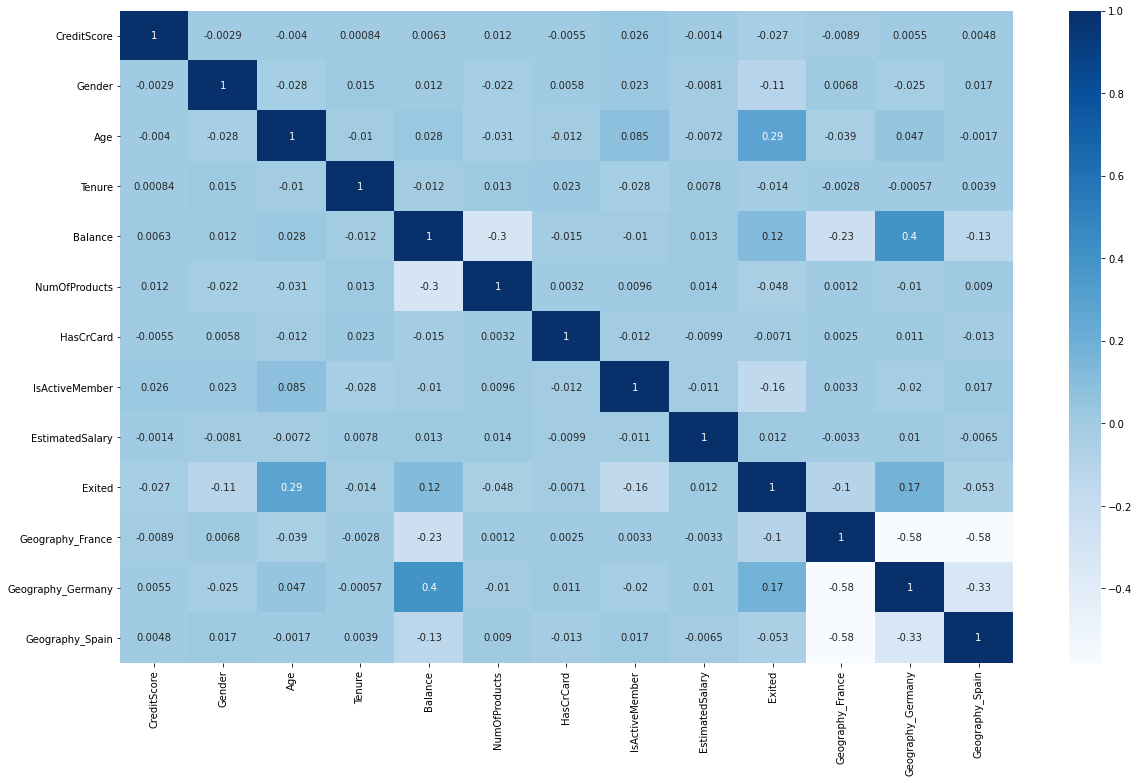

In [67]:
plt.figure(figsize=(20,12))
plt.rcParams.update({'font.size': 10})
sns.heatmap(df_treino.corr(), annot=True, cmap='Blues') # criar um heatmap (mapa de calor)

- não existem variáveis Xs (ou seja, características dos clientes) altamente correlacionadas com a variável alvo (Exited)
- mas entre todas as variáveis Xs, Age, Geography_Germany, IsActiveMember, Balance e Gender são as que estão mais correlacionadas com a variável alvo

3.2.1. Transformação da escala dos dados

In [68]:
df_treino.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


As variáveis CreditScore, Balance e EstimatedSalary possuem escalas de grandezas distintas. Portanto, deixar as variáveis numa mesma escala para evitar que análises posteriores fiquem enviesadas para as variáveis de maior grandeza

In [69]:
X_Treino=df_treino.drop(columns=['Exited'])

In [70]:
X_Treino.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [71]:
sc = MinMaxScaler()

In [72]:
X_Treino[['CreditScore','Balance','EstimatedSalary']] = sc.fit_transform(X_Treino[['CreditScore','Balance','EstimatedSalary']])
X_Treino.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,42,2,0.000000,1,1,1,0.506735,1,0,0
1,0.516,0,41,1,0.334031,1,0,1,0.562709,0,0,1
2,0.304,0,42,8,0.636357,3,1,0,0.569654,1,0,0
3,0.698,0,39,1,0.000000,2,0,0,0.469120,1,0,0
4,1.000,0,43,2,0.500246,1,1,1,0.395400,0,0,1


In [73]:
df_teste[['CreditScore','Balance','EstimatedSalary']] = sc.fit_transform(df_teste[['CreditScore','Balance','EstimatedSalary']])
df_teste.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.411157,1,31,1,0.000000,1,0,1,0.101298,1,0,0
1,0.419421,1,34,4,0.000000,1,0,1,0.019060,1,0,0
2,0.626033,0,20,7,0.000000,2,1,0,0.644939,1,0,0
3,0.677686,1,39,4,0.819096,1,1,1,0.406481,1,0,0
4,0.285124,1,28,10,0.516695,1,1,1,0.939612,0,0,1


3.2.2. Seleção das variáveis X (Redução da dimensionalidade = redução de variáveis)  

Três técnicas usadas: Random Forest, RFE e SelectKBest

3.2.2.1. Random Forest (RF)

In [74]:
model = RandomForestClassifier()
model.fit(X_Treino,y)

RandomForestClassifier()

<AxesSubplot:>

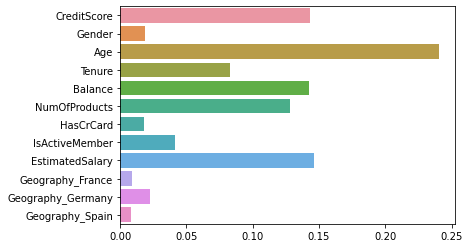

In [75]:
sns.barplot(y= X_Treino.columns, x = model.feature_importances_)

3.2.2.2. Recursive Feature Elimination (RFE) with Random Forest (RF)

In [76]:
selector = RFE(model, n_features_to_select=6)
x_feature_selected = selector.fit_transform(X_Treino, y)

In [77]:
X_Treino.columns[selector.get_support(indices=True)]

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'],
      dtype='object')

3.2.2.3. SelectKBest

In [78]:
selector = SelectKBest(f_classif, k=6)
X_Treino_feature_selected = selector.fit_transform(X_Treino, y)

In [79]:
X_Treino.columns[selector.get_support(indices=True)]

Index(['Gender', 'Age', 'Balance', 'IsActiveMember', 'Geography_France',
       'Geography_Germany'],
      dtype='object')

<AxesSubplot:>

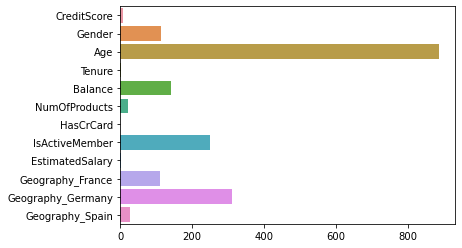

In [80]:
sns.barplot(y=X_Treino.columns, x = selector.scores_)

Geography_Spain e HasCrCard foram as únicas que não apareceram entre as seis variáveis mais importantes nas três abordagens usadas acima. Sendo assim, inicialmente, vou ajustar modelos  usando todas as variáveis. Caso não obtenha boa performe dos mesmos, retorno para essa questão, ou seja, , ajustar modelos sem as duas variáveis (Geography_Sapin e HasCrCard)   

3.2.2. Balanceamento da variável alvo (Exited) 
- Gerar novas observações da classe minoritária usando o algoritmo SMOTE (Synthetic Minority Oversampling Technique). No caso do presente projeto, a classe minoritária é o abandono de clientes (churn) junto à instituição financeira

In [81]:
smote = SMOTE()

In [82]:
X_Treino_balanceado, y_balanceado = smote.fit_resample(X_Treino, y)

In [83]:
y_balanceado = pd.Series(y_balanceado, name=y.name)
y_balanceado.head(1)

0    1
Name: Exited, dtype: int64

Verificar se gerou novas observações da classe minoritária   

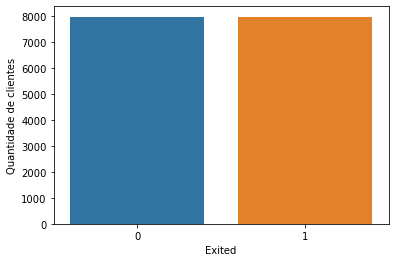

In [84]:
ax = sns.countplot(x=y_balanceado)
ax.set_ylabel("Quantidade de clientes")
ax.set_xlabel("Exited");

4. Modelagem (Modelo de Classificação, pois a variável alvo (Exited) é binária 0 ou 1)

4.1. Geração (criação) dos modelos e avaliação dos modelos 

4.1.1. Primeiro modelo (Regressão Logística)

In [85]:
classifierLR = LogisticRegression(max_iter=500, random_state = 42)

4.1.1.1. Dados desbalanceados

In [86]:
# Creating Logistic Regression list of metrics
logistic_regression_sem_balancear = []

# Cross validating the model
cv_result = cross_validate(classifierLR, X_Treino, y, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Logistic Regression list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  logistic_regression_sem_balancear.append(cv_result[i].mean())

In [87]:
# Printing the Logistic Regression metrics
logistic_regression_sem_balancear

[0.8098000000000001,
 0.5961425526650028,
 0.21162223510093692,
 0.3108457701518028,
 0.7661327514611408]

4.1.1.2. Dados balanceados

In [88]:
# Creating Logistic Regression list of metrics
logistic_regression_balanceado = []

# Cross validating the model
cv_result = cross_validate(classifierLR, X_Treino_balanceado, y_balanceado, cv=10,
                       # Printing the Logistic Regression metrics
                              scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Logistic Regression list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  logistic_regression_balanceado.append(cv_result[i].mean())

In [89]:
# Printing the Logistic Regression metrics
logistic_regression_balanceado

[0.75882961574981,
 0.7645039613979744,
 0.7457477159952838,
 0.7530394233193525,
 0.8428336442082547]

4.1.2. Segundo modelo (Naive Bayes)

In [90]:
classifierNB = GaussianNB()

4.1.2.1. Dados desbalanceados

In [91]:
# Creating Gaussian Naive Bayes list of metrics
naive_bayes_sem_balancear = []

# Cross validating the model
cv_result = cross_validate(classifierNB, X_Treino, y, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Gaussian Naive Bayes list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  naive_bayes_sem_balancear.append(cv_result[i].mean())

In [92]:
# Printing the Gaussian Naive Bayes metrics
naive_bayes_sem_balancear

[0.8187,
 0.5892423243275735,
 0.3696657973534241,
 0.4534118831665996,
 0.7839032521924916]

4.1.2.2. Dados balanceados

In [93]:
# Creating Gaussian Naive Bayes list of metrics
naive_bayes_balanceado = []

# Cross validating the model
cv_result = cross_validate(classifierNB, X_Treino_balanceado, y_balanceado, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Gaussian Naive Bayes list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  naive_bayes_balanceado.append(cv_result[i].mean())

In [94]:
# Printing the Gaussian Naive Bayes metrics
naive_bayes_balanceado

[0.749784783932216,
 0.7570778853230276,
 0.7348070339148692,
 0.744693783139605,
 0.8284785968232619]

4.1.3. Terceiro modelo (Random Forest - RF)

In [95]:
classifierRF = RandomForestClassifier(random_state = 42)

4.1.3.1. Dados desbalanceados

In [96]:
# Creating Random Forest list of metrics
random_forest_sem_balancear = []

# Cross validating the model
cv_result = cross_validate(classifierRF, X_Treino, y, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Random Forest list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  random_forest_sem_balancear.append(cv_result[i].mean())

In [97]:
# Printing the RF metrics
random_forest_sem_balancear

[0.8630000000000001,
 0.7705378586364408,
 0.46785231333912874,
 0.5809749250078682,
 0.8515074719404115]

4.1.3.2. Dados balanceados

In [98]:
# Creating Random Forest list of metrics
random_forest_balanceado = []

# Cross validating the model
cv_result = cross_validate(classifierRF, X_Treino_balanceado, y_balanceado, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Random Forest list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  random_forest_balanceado.append(cv_result[i].mean())

In [99]:
# Printing the RF metrics
random_forest_balanceado

[0.8903116887008805,
 0.887939178373532,
 0.8925490060087136,
 0.8885899979920234,
 0.9552211756832116]

4.1.4. Quarto modelo (Decision Tree)

In [100]:
classifierDT = DecisionTreeClassifier(random_state = 42)

4.1.4.1. Dados desbalanceados

In [101]:
# Creating Decision Tree list of metrics
decision_tree_sem_balancear = []

# Cross validating the model
cv_result = cross_validate(classifierDT, X_Treino, y, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Decision Tree list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  decision_tree_sem_balancear.append(cv_result[i].mean())

In [102]:
# Printing the Decision Tree metrics
decision_tree_sem_balancear

[0.792,
 0.4893383370229999,
 0.5130131362889984,
 0.5005873097862061,
 0.688191971320984]

4.1.4.2. Dados Balanceados

In [103]:
# Creating Decision Tree list of metrics
decision_tree_balanceado = []

# Cross validating the model
cv_result = cross_validate(classifierDT, X_Treino_balanceado, y_balanceado, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Decision Tree list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  decision_tree_balanceado.append(cv_result[i].mean())

In [104]:
# Printing the Decision Tree metrics
decision_tree_balanceado

[0.8231241344828348,
 0.8119698961270198,
 0.8401762577000434,
 0.8244526148422322,
 0.8231388277649225]

4.1.5. Quinto modelo (LGBM) 

In [108]:
LGBM_model=LGBMClassifier(random_state=42)

4.1.5.1. Dados desbalanceados

In [109]:
# Creating LGBM list of metrics
LGBM_model_sem_balancear = []

# Cross validating the model
cv_result = cross_validate(LGBM_model, X_Treino, y, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to LGBM list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  LGBM_model_sem_balancear.append(cv_result[i].mean())

In [110]:
# Printing the LGBM metrics
LGBM_model_sem_balancear

[0.8604,
 0.7344783914452692,
 0.4943470491644934,
 0.5896946865730821,
 0.8596630991335639]

4.1.5.2. Dados balanceados

In [111]:
# Creating LGBM list of metrics
LGBM_model_balanceado = []

# Cross validating the model
cv_result = cross_validate(LGBM_model, X_Treino_balanceado, y_balanceado, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to LGBM list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  LGBM_model_balanceado.append(cv_result[i].mean())

In [112]:
# Printing the LGBM metrics
LGBM_model_balanceado

[0.8567820268953051,
 0.863404785949937,
 0.8468378593090925,
 0.8531524375527338,
 0.9349910732834807]

4.2. Comparar as métricas dos modelos

In [113]:
metricas = (pd.DataFrame([logistic_regression_sem_balancear,logistic_regression_balanceado,naive_bayes_sem_balancear,naive_bayes_balanceado,random_forest_sem_balancear, random_forest_balanceado, decision_tree_sem_balancear,decision_tree_balanceado, LGBM_model_sem_balancear, LGBM_model_balanceado],
                        index=['Logistic Regression sem balancear','Logistic Regression balanceado','Naive Bayes sem balancear','Naive Bayes balanceado','Random Forest sem balancear', 'Random Forest balanceado','Decision Tree sem balancear','Decision Tree balanceado','LGBM sem balancear','LGBM balanceado'],
                        columns=['Accuracy','Precision','Recall','F1 Score','AUROC'])*100).round(2)

metricas

,Accuracy,Precision,Recall,F1 Score,AUROC
Logistic Regression sem balancear,80.98,59.61,21.16,31.08,76.61
Logistic Regression balanceado,75.88,76.45,74.57,75.30,84.28
Naive Bayes sem balancear,81.87,58.92,36.97,45.34,78.39
Naive Bayes balanceado,74.98,75.71,73.48,74.47,82.85
Random Forest sem balancear,86.30,77.05,46.79,58.10,85.15
Random Forest balanceado,89.03,88.79,89.25,88.86,95.52
Decision Tree sem balancear,79.20,48.93,51.30,50.06,68.82
Decision Tree balanceado,82.31,81.20,84.02,82.45,82.31
LGBM sem balancear,86.04,73.45,49.43,58.97,85.97
LGBM balanceado,85.68,86.34,84.68,85.32,93.50


Para o problema de negócio, o mais importante é prever corretamente os clientes que provavelmente abandonarão a instituição financeira (verdadeiros positivos, ou seja, previsão de que ocorre abondono "churn" e, de fato, ocorre) e, também, minimizar o número de clientes erroneamente classificados como sem previsão de abandonar (falsos negativos, ou seja, previsão de que não ocorre abandono "churn", mas ocorre). Portanto, a métrica utilizada será o recall.

In [114]:
metricas['Recall'].sort_values(ascending=False)

Random Forest balanceado             89.25
LGBM balanceado                      84.68
Decision Tree balanceado             84.02
Logistic Regression balanceado       74.57
Naive Bayes balanceado               73.48
Decision Tree sem balancear          51.30
LGBM sem balancear                   49.43
Random Forest sem balancear          46.79
Naive Bayes sem balancear            36.97
Logistic Regression sem balancear    21.16
Name: Recall, dtype: float64

- Melhor modelo: Random Forest balanceado
- Além disso, o RF balanceado também mostrou maiores performances nas outras métrica
- Modelos sem balancear: não apresentaram boas performances  

4.3. Tunagem de hiperparâmetros do Melhor Modelo (RF)

In [116]:
tuned_classifierRF = RandomForestClassifier()

# Parameters to be used
params_RF = {'n_estimators':[100,200],
             'min_samples_leaf':[1,2,3],
             'max_depth':[None,1,2],
             'criterion':['gini','entropy']}

gs_RF = GridSearchCV(estimator=tuned_classifierRF, 
                      param_grid=params_RF, 
                      cv=10, 
                      scoring='recall')

# Fitting the model to the training set  
gs_RF.fit(X_Treino_balanceado, y_balanceado)

# Printing the best score adquired from the tunning
best_recall = gs_RF.best_score_
print("Best Recall Score: {:.2f} %".format(best_recall*100))

# Printing the best parameter found
best_parameters = gs_RF.best_params_
print("Best Parameters:", best_parameters)

Best Recall Score: 89.62 %
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}


In [117]:
tuned_classifierRF = RandomForestClassifier()

# Parameters to be used
params_RF = {'n_estimators':[100,200,300],
             'min_samples_leaf':[1,2,3],
             'max_depth':[None,1,2],
             'criterion':['gini','entropy']}

gs_RF = GridSearchCV(estimator=tuned_classifierRF, 
                      param_grid=params_RF, 
                      cv=10, 
                      scoring='recall')

# Fitting the model to the training set  
gs_RF.fit(X_Treino_balanceado, y_balanceado)

# Printing the best score adquired from the tunning
best_recall = gs_RF.best_score_
print("Best Recall Score: {:.2f} %".format(best_recall*100))

# Printing the best parameter found
best_parameters = gs_RF.best_params_
print("Best Parameters:", best_parameters)

Best Recall Score: 89.68 %
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}


4.4. Treinando com todos os dados de treino
- Treinar (ajustar) o melhor modelo (RF balanceado) com os melhores hiperparâmetros

In [118]:
RF = RandomForestClassifier(n_estimators=300, max_depth=None, 
                             criterion='gini', random_state=42)

RF.fit(X_Treino_balanceado, y_balanceado)

RandomForestClassifier(n_estimators=300, random_state=42)

In [119]:
df_teste.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.411157,1,31,1,0.000000,1,0,1,0.101298,1,0,0
1,0.419421,1,34,4,0.000000,1,0,1,0.019060,1,0,0
2,0.626033,0,20,7,0.000000,2,1,0,0.644939,1,0,0
3,0.677686,1,39,4,0.819096,1,1,1,0.406481,1,0,0
4,0.285124,1,28,10,0.516695,1,1,1,0.939612,0,0,1


5. Previsão usando os dados de teste

In [120]:
pred_RF_test = RF.predict(df_teste)

In [121]:
pred_RF_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [122]:
np.savetxt('C:/Users/Fabi Borges/LightHouse/test1.csv', pred_RF_test, delimiter=',')